### 2. **PCA for Reduced Dimensionality in Image Classification**

#### For this problem you will use an **image segmentation data set** for image classification. You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. You will compare classification accuracies with and without PCA using the provided image class assignments as the class labels. You will also use machine Scikit-learn's pipelines to automate preprocessing, data transformation with PCA, and model optimization (using Random Forest). The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

#### Your tasks in this problem are the following.

#### a. **[5 pts]** Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Use scikit-learns's **train_test_split** to split the data into 80% training and 20% test sets. Use **random_state=99**. Scale the data using scikit-learn's **StandardScaler** (note that the scaler must only be fit to the training data and then used to transform both training and test sets).

In [26]:
# convert the segmentation feature names into list
segmentation_names = pd.read_csv('./segmentation_data/segmentation_names.txt', header=None)[0].tolist()
# used segmentation_names as header
segmentation_data = pd.read_csv('./segmentation_data/segmentation_data.txt', names=segmentation_names)

In [27]:
segmentation_data.head(5)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [28]:
segmentation_classes = pd.read_csv('./segmentation_data/segmentation_classes.txt', delimiter='\t', names=['Class Label', 'Numeric Class Label'])
segmentation_classes.head(5)

,Class Label,Numeric Class Label
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [29]:
X = segmentation_data.to_numpy()
y = segmentation_classes['Numeric Class Label'].to_numpy()

In [30]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (1680, 19), y_train shape: (1680,)
X_test shape: (420, 19), y_test shape: (420,)


In [31]:
# scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled

array([[ 0.59485897, -1.37598744,  0.        , ...,  1.8646522 ,
        -0.56967834, -0.57579514],
       [-0.48290825, -0.92247132,  0.        , ..., -0.3823287 ,
        -0.0435137 , -0.18061726],
       [ 1.37248848,  1.1532371 ,  0.        , ...,  0.32655589,
        -0.57761353, -0.43228222],
       ...,
       [ 1.08599339,  0.15899021,  0.        , ..., -1.01273892,
         2.53984284, -0.47655931],
       [-1.1650394 , -1.44575915,  0.        , ..., -0.35355475,
         0.02618273, -0.26780653],
       [ 1.49527208, -0.32941177,  0.        , ..., -0.58897766,
        -0.32026624, -0.52001035]], shape=(1680, 19))

In [33]:
X_test_scaled

array([[ 0.8540688 , -0.45151226,  0.        , ..., -0.08935795,
        -0.71005015, -0.38982968],
       [ 0.58121634,  1.06602246,  0.        , ...,  0.52797318,
        -0.5469959 , -0.42068177],
       [-0.11455743, -1.48064501,  0.        , ...,  2.29887658,
        -1.07498517, -0.63285068],
       ...,
       [ 1.65898356,  1.99049764,  0.        , ..., -0.72761562,
         0.7563016 ,  2.25332966],
       [-0.89218694, -0.25964006,  0.        , ..., -0.8557903 ,
         1.94006567, -0.59906246],
       [-0.53747874, -0.6608274 ,  0.        , ...,  1.86726811,
        -0.77265689, -0.63787268]], shape=(420, 19))

_I loaded the image segmentation data using pandas, reading the feature names from segmentation_names.txt and using them as column headers for the data file. I also loaded the class labels from segmentation_classes.txt, extracting the numeric class labels. I split the data into 80% training and 20% test sets using train_test_split with random_state=99. Then I used StandardScaler to scale the data, fitting it only on the training data and then transforming both training and test sets to ensure no data leakage from the test set into the scaling parameters._

#### b. **[10 pts]** Next, perform PCA on the scaled image train data. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the smallest number, r, of PCs needed to capture at least 95% of variance in the data. Provide a Scree plot of PC variances. Note the optimal number of components for the next step.

In [34]:
# perform PCA on the scaled image train data
from sklearn.decomposition import PCA

# fit PCA on scaled training data
pca = PCA()
pca.fit(X_train_scaled)

np.set_printoptions(precision=3, suppress=True)
print(pca.explained_variance_ratio_)

[0.423 0.163 0.099 0.059 0.051 0.05  0.041 0.031 0.03  0.022 0.014 0.009
 0.007 0.    0.    0.    0.    0.    0.   ]


In [35]:
# calculate cumulative explained variance by PCA
np.set_printoptions(precision=3, suppress=True)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.423, 0.586, 0.686, 0.745, 0.796, 0.845, 0.886, 0.918, 0.948,
       0.97 , 0.984, 0.993, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

In [36]:
# determine the smallest number (r) of PCs needed to capture at least 95% of variance in the data
r = np.searchsorted(cumulative_variance, 0.95)
print(f"Smallest number of components for 95% variance: {r}")

Smallest number of components for 95% variance: 9


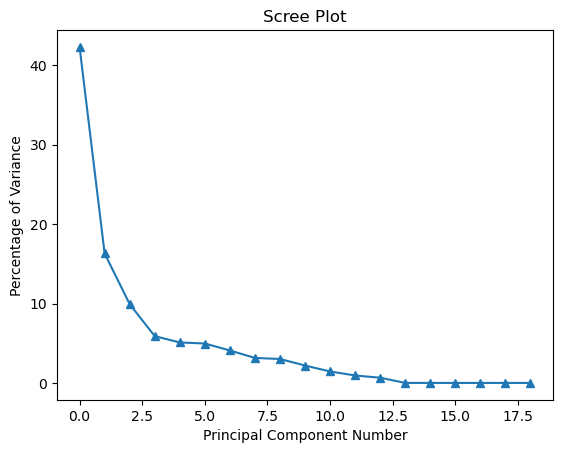

In [37]:
varPercentage = pca.explained_variance_ratio_*100
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(varPercentage)), varPercentage[:], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.title('Scree Plot')
plt.show()

_I performed PCA on the scaled training data using sklearn's PCA module. I calculated the cumulative explained variance ratio to determine the smallest number of principal components needed to capture at least 95% of the variance. I found that r=9 components are sufficient to capture 95% of the variance. I created a scree plot showing the percentage of variance explained by each principal component, which helps visualize how much information each component contributes. The plot shows that the first few components capture most of the variance, with the first component alone explaining about 42.3% of the variance._

#### c. **[10 pts]** Create a **RandomForest** model object (without fitting it to the training data) using the following parameters: **RandomForestClassifier(n_estimators=10, random_state=33)**. Also create a new StandardScaler object and a new PCA object (with the optimum number of components, r) without fitting these to the training data. Next, using either **make_pipeline()** or **Pipeline** from the **sklearn.pipeline** module, create two separate model pipelines, one with the sequence **StandardScaler --> RandomForestClassifier** and another with the sequence **StandardScaler --> PCA --> RandomForestClassifier**. Fit both model pipelines to the original, non-scaled, training data. For example, fitting the second model to the train data may result in this output.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# create RandomForest model object (without fitting it to the training data)
rf_clf_1 = RandomForestClassifier(n_estimators=10, random_state=33)
rf_scaler_1 = StandardScaler()

rf_clf_2 = RandomForestClassifier(n_estimators=10, random_state=33)
rf_scaler_2 = StandardScaler()
rf_pca_2 = PCA(n_components=r)

In [39]:
# StandardScaler --> RandomForestClassifier
pipeline1 = make_pipeline(rf_scaler_1, rf_clf_1)

# StandardScaler --> PCA --> RandomForestClassifier
pipeline2 = make_pipeline(rf_scaler_2, rf_pca_2, rf_clf_2)

In [40]:
# fit both model pipelines to the original, non-scaled, training data
pipeline1.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [41]:
pipeline2.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,np.int64(9)
,copy,True
,whiten,False
,svd_solver,'auto'


_I created two separate pipelines using make_pipeline. The first pipeline consists of StandardScaler followed by RandomForestClassifier with n_estimators=10 and random_state=33. The second pipeline adds PCA with r=9 components between the scaler and the classifier. I created new StandardScaler, PCA, and RandomForestClassifier objects without fitting them first, then used make_pipeline to chain them together. Both pipelines were fitted to the original, non-scaled training data, which allows the scaler and PCA to learn the appropriate transformations from the training data._

#### d. **[10 pts]** Use scikit-learn's cross_val_score function to measure the overall classification accuracies for both models using 10-fold cross-validation on the original, non-scaled training data. In each case, compare the cross-validation accuracy to the accuracy of the model on the training data (using the two trained models from part (c).

In [42]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation on original, non-scaled training data
cv_scores_pipeline1 = cross_val_score(pipeline1, X_train, y_train, cv=10)
cv_scores_pipeline2 = cross_val_score(pipeline2, X_train, y_train, cv=10)

In [43]:
print('Pipeline 1 (StandardScaler --> RandomForest): ')
print(f'Cross-validation accuracy: {cv_scores_pipeline1.mean():.4f}')
print(f'Training accuracy: {pipeline1.score(X_train, y_train):.4f}')

Pipeline 1 (StandardScaler --> RandomForest): 
Cross-validation accuracy: 0.9685
Training accuracy: 0.9988


In [44]:
print('Pipeline 2 (StandardScaler --> PCA --> RandomForest):')
print(f'Cross-validation accuracy: {cv_scores_pipeline2.mean():.4f}')
print(f'Training accuracy: {pipeline2.score(X_train, y_train):.4f}')

Pipeline 2 (StandardScaler --> PCA --> RandomForest):
Cross-validation accuracy: 0.9143
Training accuracy: 0.9982


_I used cross_val_score with 10-fold cross-validation to evaluate both pipelines on the original, non-scaled training data. Pipeline 1 (StandardScaler --> RandomForest) achieved a cross-validation accuracy of 0.9685 and training accuracy of 0.9988. Pipeline 2 (StandardScaler --> PCA --> RandomForest) achieved a cross-validation accuracy of 0.9143 and training accuracy of 0.9982. The results show that Pipeline 1 performs better, suggesting that PCA dimensionality reduction may have removed some useful information for this dataset. However, both models show high training accuracy, indicating they fit the training data well._

#### e. **[15 pts]** Next, set up a new three-step pipeline using scikit-learn's **Pipeline()** function with standard scaler, PCA (with the optimum number of components from part (b)), and a default RandomForest Classifier (**RandomForestClassifier(random_state = 77)**) as the pipeline steps. Create a GridSearchCV parameter grid with the following parameters: **n_estimators** (from 1 to 200 in increments of 5), **max_depth** (with the list of values: [1, 5, 10, 15, 20, 25]), and **min_samples_split** (with values: [2, 3, 4, 5]). Create a GridSearchCV object using this pipeline, the parameter grid, and 5-fold cross-validation. Then, run the grid search on the original non-scaled data. Report the best parameters and the overall cross-validation accuracy resulting from the grid search. Finally, create a new 3-step pipeline, as before, but with the RandomForest Classifier parameters set to the optimal values reported from the grid search. Fit this new model to the original training data, then compare the training accuracy with the accuracy on the set aside non-scaled test data from part (a).

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# create parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': range(1, 201, 5),
    'randomforestclassifier__max_depth': [1, 5, 10, 15, 20, 25],
    'randomforestclassifier__min_samples_split': [2, 3, 4, 5]
}

# three-step pipeline using scikit-learn's Pipeline() function
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=r)),
    ('randomforestclassifier', RandomForestClassifier(random_state=77))
])

In [46]:
# create GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5)

# run the grid search on the original non-scaled data
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=77))])
,param_grid,"{'randomforestclassifier__max_depth': [1, 5, ...], 'randomforestclassifier__min_samples_split': [2, 3, ...], 'randomforestclassifier__n_estimators': range(1, 201, 5)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [47]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

Best parameters: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__n_estimators': 76}
Best cross-validation accuracy: 0.9351


In [48]:
# create a new 3-step pipeline with optimal parameters
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=r)),
    ('randomforestclassifier', RandomForestClassifier(
        n_estimators=grid_search.best_params_['randomforestclassifier__n_estimators'],
        max_depth=grid_search.best_params_['randomforestclassifier__max_depth'],
        min_samples_split=grid_search.best_params_['randomforestclassifier__min_samples_split'],
        random_state=77
    ))
])

In [49]:
# fit to the original training data
best_pipeline.fit(X_train, y_train)

# compare the training accuracy with the accuracy on the set aside non-scaled test data
train_accuracy = best_pipeline.score(X_train, y_train)
test_accuracy = best_pipeline.score(X_test, y_test)

print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Training accuracy: 0.9994
Test accuracy: 0.9429


_I created a three-step pipeline using Pipeline() with StandardScaler, PCA (with r=9 components), and RandomForestClassifier with random_state=77. I set up a GridSearchCV with a parameter grid that searches over n_estimators (from 1 to 200 in increments of 5), max_depth (values [1, 5, 10, 15, 20, 25]), and min_samples_split (values [2, 3, 4, 5]) using 5-fold cross-validation. The grid search found optimal parameters: n_estimators=76, max_depth=15, and min_samples_split=3, with a best cross-validation accuracy of 0.9351. I then created a new pipeline with these optimal parameters and fitted it to the training data. The final model achieved a training accuracy of 0.9994 and test accuracy of 0.9429, showing good generalization with only a small gap between training and test performance._